In [5]:
import numpy as np
import matplotlib.pyplot as plt
from spafe.features import mfcc
import librosa.util as util
import librosa
from spafe.utils import vis

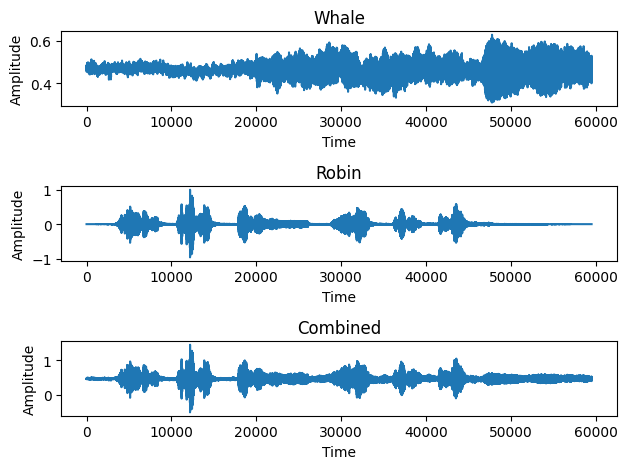

In [34]:
# load files 
file_a = librosa.example('humpback')
y_a, sr = librosa.load(file_a)
y_a = librosa.util.normalize(y_a)

file_b = librosa.example('robin')
y_b, sr = librosa.load(file_b)
y_b = librosa.util.normalize(y_b)

# split whale to same length as robin 
oft = 80000
y_a = y_a[oft:len(y_b) + oft]

# combine sounds in time domain
y_c = y_a + y_b

# normalise ?
plt.subplot(3, 1, 1)  # Subplot 1
plt.plot(y_a)
plt.title('Whale')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)  # Subplot 1
plt.plot(y_b)
plt.title('Robin')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)  # Subplot 1
plt.plot(y_c)
plt.title('Combined')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()



In [41]:
nfft = 128
def get_feature(sample, nfft):
    return np.log(np.abs(librosa.stft(sample, n_fft=nfft)).T)

def vis_helper(feature, title="",x="Frame", y="Feature"):
    vis.show_features(feature, title, y, x, figsize=(6, 3), cmap="viridis")

In [42]:
# get features
features_a = get_feature(y_a, nfft=nfft)
features_b = get_feature(y_b, nfft=nfft)
feature_combined = get_feature(y_c, nfft=nfft)

import pickle as pkl


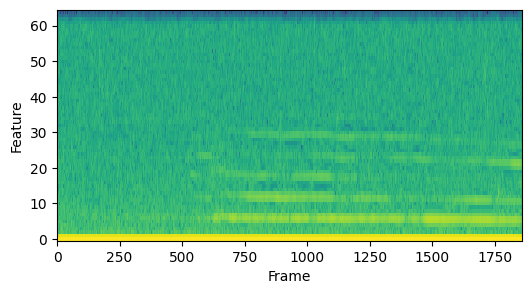

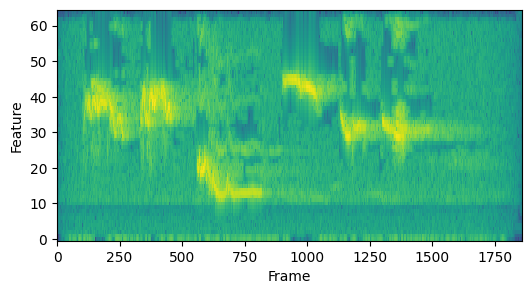

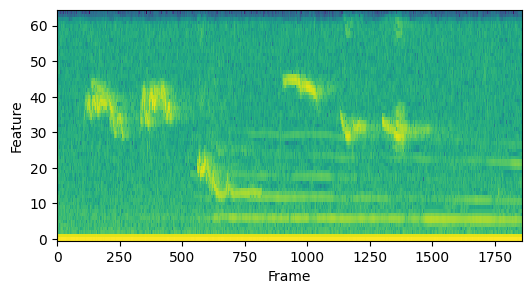

In [43]:
vis_helper(features_a)
vis_helper(features_b)
vis_helper(feature_combined)

In [45]:
# save features as csv

# Save the 2D array as a CSV file
np.savetxt('whale_features.csv', features_a, delimiter=',', fmt='%f')
np.savetxt('robin_features.csv', features_b, delimiter=',', fmt='%f')
np.savetxt('combined_features.csv', feature_combined, delimiter=',', fmt='%f')